In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
dataPath = r'E:\Edu\Academic\Year 3\Second Term\ML\Project\Milestone 1\Milestone 1\Datasets\taxi-price-prediction\taxi'

In [98]:
taxiRides = pd.read_csv(dataPath + '\\taxi-rides.csv')
weather = pd.read_csv(dataPath + '\\weather.csv')

In [99]:
print(f"Taxi Rides has {taxiRides.shape[0]} Rows and {taxiRides.shape[1]} ")
taxiRides.head()

Taxi Rides has 554456 Rows and 10 


,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0


In [5]:
print(f"Weather has {weather.shape[0]} Rows and {weather.shape[1]} ")
weather.head()

Weather has 6276 Rows and 8 


,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


# Data Cleaning

## Taxi Rides

In [7]:
taxiRides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554456 entries, 0 to 554455
Data columns (total 10 columns):
distance            554456 non-null float64
cab_type            554456 non-null object
time_stamp          554456 non-null float64
destination         554456 non-null object
source              554456 non-null object
surge_multiplier    554456 non-null float64
id                  554456 non-null object
product_id          554456 non-null object
name                554456 non-null object
price               510321 non-null float64
dtypes: float64(4), object(6)
memory usage: 42.3+ MB


In [8]:
nonIntegerColumns = [col for col in taxiRides.columns if taxiRides[col].dtypes == np.object]
print(f"Non Integer Columns : {nonIntegerColumns}")

Non Integer Columns : ['cab_type', 'destination', 'source', 'id', 'product_id', 'name']


## Null

In [9]:
taxiRides.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
surge_multiplier        0
id                      0
product_id              0
name                    0
price               44135
dtype: int64

## product_id and name

In [10]:
taxiRides['product_id'].value_counts()

55c66225-fbe7-4fd5-9072-eab1ece5e23e    44204
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    44135
997acbb5-e102-41e1-b155-9df7de0a73f2    44108
6d318bcc-22a3-4af6-bddd-b409bfce1546    44038
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    44024
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    43983
6c84fd89-3f11-4782-9b50-97c468b19529    43977
lyft_plus                               41142
lyft_lux                                41041
lyft                                    41015
lyft_luxsuv                             40979
lyft_premier                            40969
lyft_line                               40841
Name: product_id, dtype: int64

In [11]:
taxiRides['name'].value_counts()

UberX           44204
Taxi            44135
UberPool        44108
Black SUV       44038
WAV             44024
UberXL          43983
Black           43977
Lyft XL         41142
Lux Black       41041
Lyft            41015
Lux Black XL    40979
Lux             40969
Shared          40841
Name: name, dtype: int64

product_id and name represent the same feature so we can drop one of them

## Encoding Timestamps to date

In [102]:
weatherDate = pd.to_datetime(weather['time_stamp'], unit='s').apply(lambda x: x.strftime(('%Y-%m-%d')))

In [103]:
taxiRidesDate = pd.to_datetime(taxiRides['time_stamp'] / 1000,unit='s').apply(lambda x: x.strftime(('%Y-%m-%d')))

In [104]:
weather['date'] = weatherDate

In [105]:
taxiRides['date'] = taxiRidesDate

In [106]:
taxiRides.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price,date
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2018-12-14
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,2018-11-28
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,2018-12-16
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,2018-11-30
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,2018-11-30


In [107]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16


In [108]:
taxiRides.drop(['time_stamp'],axis = 1, inplace = True)
weather.drop(['time_stamp'],axis = 1, inplace = True)

## Joining Dataframes based on date

In [109]:
mergedData = pd.merge(taxiRides,weather.drop_duplicates(subset=['date', 'location']), how = 'left', left_on=['date', 'source'], right_on=['date', 'location'])

In [110]:
mergedData.head()

,distance,cab_type,destination,source,surge_multiplier,id,product_id,name,price,date,temp,location,clouds,pressure,rain,humidity,wind
0,0.62,Uber,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2018-12-14,27.34,Haymarket Square,0.15,1033.40,NaN,0.81,3.04
1,2.27,Uber,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,2018-11-28,33.67,Beacon Hill,0.12,991.20,NaN,0.82,5.37
2,2.00,Lyft,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,2018-12-16,42.34,Haymarket Square,1.00,1012.15,0.2068,0.77,11.49
3,3.98,Lyft,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,2018-11-30,38.46,Northeastern University,0.96,1017.24,NaN,0.66,3.31
4,1.49,Lyft,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,2018-11-30,38.46,Northeastern University,0.96,1017.24,NaN,0.66,3.31


## Rain Feature

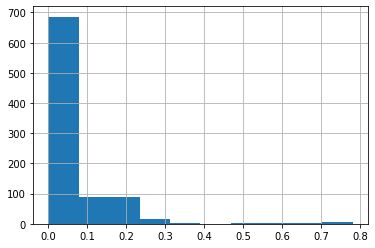

In [111]:
weather['rain'].hist()

In [112]:
weather[weather['rain'].isnull()]

,temp,location,clouds,pressure,rain,humidity,wind,date
11,43.28,Back Bay,0.81,990.81,NaN,0.71,8.30,2018-11-27
12,43.27,Beacon Hill,0.80,990.80,NaN,0.71,8.30,2018-11-27
13,43.35,Boston University,0.82,990.82,NaN,0.71,8.24,2018-11-27
14,43.07,Fenway,0.82,990.82,NaN,0.72,8.28,2018-11-27
15,43.35,Financial District,0.80,990.80,NaN,0.71,8.35,2018-11-27
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,0.96,1.52,2018-12-03
6272,44.85,Northeastern University,0.88,1000.71,NaN,0.96,1.54,2018-12-03
6273,44.82,South Station,0.89,1000.70,NaN,0.96,1.54,2018-12-03
6274,44.78,Theatre District,0.89,1000.70,NaN,0.96,1.54,2018-12-03


In [113]:
weather[weather['rain'].notna()]

,temp,location,clouds,pressure,rain,humidity,wind,date
0,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25,2018-12-16
1,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32,2018-12-16
2,42.50,Boston University,1.0,1012.15,0.1089,0.76,11.07,2018-12-16
3,42.11,Fenway,1.0,1012.13,0.0969,0.77,11.09,2018-12-16
4,43.13,Financial District,1.0,1012.14,0.1786,0.75,11.49,2018-12-16
...,...,...,...,...,...,...,...,...
6258,39.51,North Station,1.0,1018.09,0.0280,0.92,5.41,2018-12-02
6259,39.41,Northeastern University,1.0,1018.06,0.0331,0.92,5.37,2018-12-02
6260,39.62,South Station,1.0,1018.08,0.0376,0.92,5.47,2018-12-02
6261,39.47,Theatre District,1.0,1018.08,0.0333,0.92,5.43,2018-12-02


In [114]:
weather['rain'].value_counts()

0.0030    85
0.0020    51
0.0040    23
0.0060    17
0.0050    15
          ..
0.1370     1
0.0664     1
0.7222     1
0.0223     1
0.1561     1
Name: rain, Length: 437, dtype: int64

Rain feature nulls could indicate no rain

In [115]:
mergedData.shape

(554456, 17)

In [116]:
mergedData.isnull().sum()

distance                 0
cab_type                 0
destination              0
source                   0
surge_multiplier         0
id                       0
product_id               0
name                     0
price                44135
date                     0
temp                     0
location                 0
clouds                   0
pressure                 0
rain                480515
humidity                 0
wind                     0
dtype: int64

In [117]:
mergedData

TypeError: dropna() got multiple values for argument 'axis'